# Лабораторная работа 6

### Татур Стефан, НММ-бд-02-2022

Импортируем библиотеку mnist и скачиваем датасет.

In [2]:
from mnist import load_mnist
train, validation, test = load_mnist()

Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


In [3]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip show scikit-learn

Name: scikit-learn
Version: 1.0.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /opt/anaconda3/lib/python3.9/site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: scikit-learn-intelex
Note: you may need to restart the kernel to use updated packages.


In [5]:
import sklearn as skr
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
X = train[0].reshape(55000,-1)

Y = train[1]

In [7]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

Выводим красивые картинки,используя subplots.

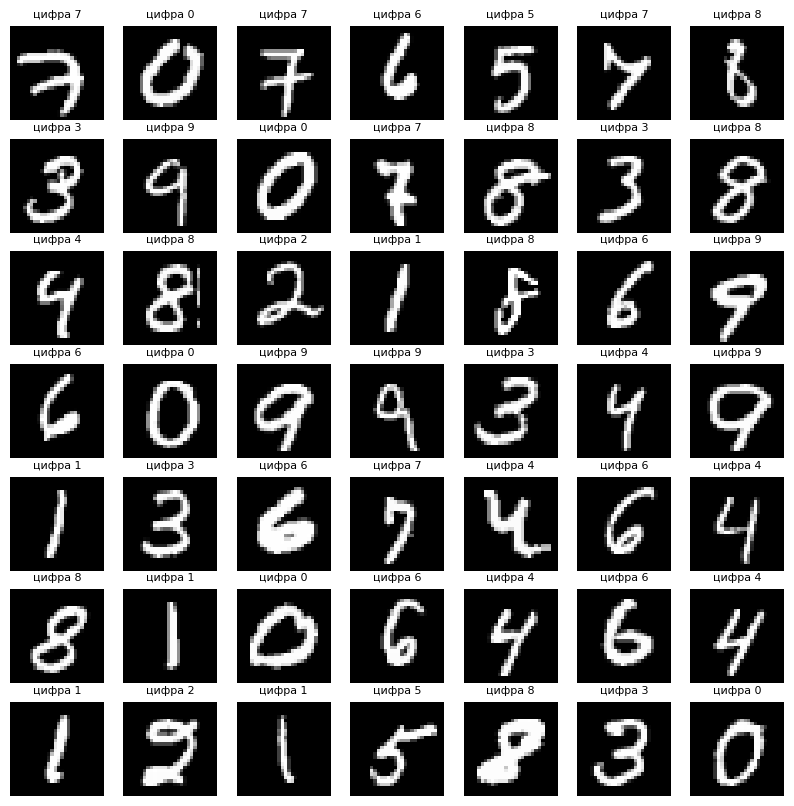

In [22]:
fig, axs = plt.subplots(7, 7, figsize=(10,10))
for i in range(7):
    for j in range(7):
        axs[i,j].imshow(train[0][i+7*j], cmap = 'gray')
        axs[i,j].set_title('цифра '+ str(train[1][i+7*j]), fontsize=8)
        axs[i,j].axis('off')

Переходим к созданию класса для метода главных компонент.

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
class my_PCA():
    def __init__(self, n_components=None): #сохраняет данные и все...
        self.n_components = n_components 
        
    def fit(self,X): #обязательно self чтобы юпитер понял что это методы класса
        X_center = X - np.mean(X,axis=0) #сделали центрирование
        cov_matrix = np.cov(X_center, rowvar=False) #пользуемся нахождением матрицы ковариации напрямую
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
        
        sorted_normalno = np.argsort(eigenvalues)[::-1] #в порядке убывания 
        self.eigenvalues = eigenvalues[sorted_normalno]
        eigenvectors = eigenvectors[:, sorted_normalno]
        self.components = eigenvectors[:, :self.n_components]

    def transform(self, X):
        return np.dot(X, self.components)
    
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

С SVD к сожалению не вышло.


Берем две главные компоненты и обращаемся к нашему классу PCA

In [16]:
pca = my_PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [14]:
#skatter(size=s,c= color) #использовать для 3-его задания 2 шага

Строим графики собственных значений и отношения кумулятивной суммы к их полной сумме.

Text(0.5, 1.0, 'График кумулятивной суммы к полной сумме')

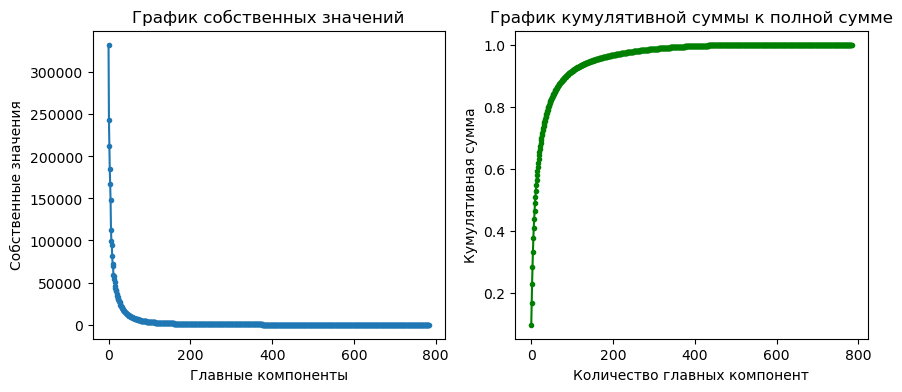

In [15]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(pca.eigenvalues, marker='.')
plt.xlabel('Главные компоненты')
plt.ylabel('Собственные значения')
plt.title('График собственных значений')

cumulative_sum = np.cumsum(pca.eigenvalues)/np.sum(pca.eigenvalues)

plt.subplot(1, 2, 2)
plt.plot(cumulative_sum, marker='.', linestyle='-',color='green')
plt.xlabel('Количество главных компонент')
plt.ylabel('Кумулятивная сумма')
plt.title('График кумулятивной суммы к полной сумме')

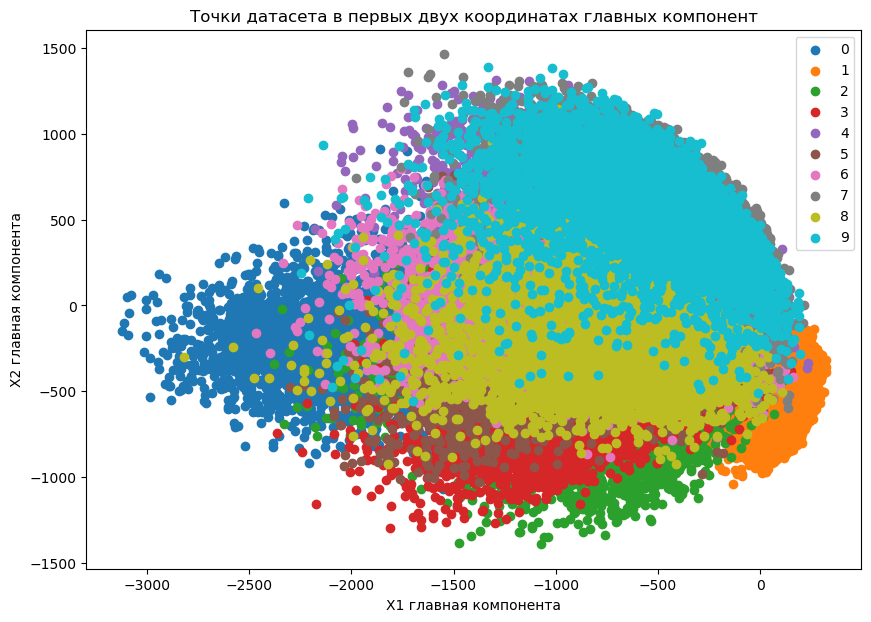

In [48]:
plt.figure(figsize=(10, 7))
for i in range(10):
    plt.scatter(X_pca[Y == i, 0], X_pca[Y == i, 1], label=str(i),cmap='viridis')
plt.xlabel('X1 главная компонента')
plt.ylabel('X2 главная компонента')
plt.title('Точки датасета в первых двух координатах главных компонент')
plt.legend()
plt.show()

### Используем имеющийся шаблон класса my_kNN, содержающие три функции:

init: сохранения параметра n_neighbors во внутреннюю переменную

fit: сохранение переданных обучающих данных X_tr и Y_tr во внутренние переменные

predict: основной метод, возвращающий предполагаемый класс. Мы считаем расстояние от искомого элемента до других элементов набора, находим индексы ближайших соседей, определяем классы этих соседей и среди классов находим тот, который встречается чаще всего, после чего добавляем предполагаемый класс в заранее созданный пустой список. Этот алгоритм выполняется для всех элементов тестового набора.

In [17]:
class my_kNN():
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X_tr = X
        self.Y_tr = y

    def predict(self, X):
        preds = []
        for x in X:
            dist = np.linalg.norm(self.X_tr - x, axis=1)
            index = np.argsort(dist)[:self.n_neighbors]
            label = self.Y_tr[index]
            pred = np.bincount(label).argmax()
            preds.append(pred)
        return np.array(preds)

Разбиваем данные на две выборки,для теста и для обучения.

In [18]:
X_tr, X_test, y_tr, y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=42)

Поставим количество соседей 5.
И обучаем его.

In [19]:
knn = my_kNN(n_neighbors=5)
knn.fit(X_tr, y_tr)

In [20]:
y_pred = knn.predict(X_test)

Оценим точность: получилось примерно 41,1%, что означает, что алгоритм не работает как случайный.

In [82]:
accuracy_score(y_test, y_pred)

0.41145454545454546

Можно использовать разные метрики,но мы будем использовать метрику accuracy.

С  помощью метода  главных компонент уменьшаем размерность данных, и внутри цикла (перебирает количество соседей от 1 до 30 с шагом 5 и количество компонент от 1 до 50 с шагом 10) применяем алгоритм k-ближайших соседей к преобразованным  данным. Также внутри цикла сравниваем получившуюся точность и находим количество соседей и количество компонент, при которых алгоритм даёт наибольшую точность на тестовой выборке. Далее строим графики зависимости доли правильных ответов в зависимости от количества главных компонент для шести значений числа соседей: 1, 6, 11, 16, 26.

In [23]:
best_accuracy = 0
best_n_neighbors = 0
best_n_components = 0
pca = my_PCA(n_components=50)
X_tr_pca = pca.fit_transform(X_tr)
X_test_pca = pca.transform(X_test)
accuracies = []

In [29]:
from tqdm import tqdm

for n_neighbors in tqdm(range(1, 31, 5)):
    n_accuracies = []
    knn = my_kNN(n_neighbors=n_neighbors)
    knn.fit(X_tr_pca[:, :n_components], y_tr)
    y_pred = knn.predict(X_test_pca[:, :n_components])
    accuracy = accuracy_score(y_test[:1000], y_pred[:1000])
    accuracies.append(accuracy)
    if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_n_neighbors = n_neighbors
            best_n_components = n_components
            n_accuracies.append(accuracy)
    accuracies.append(n_accuracies)
    
    print(f'{k=},{accuracy=}')

 17%|███████▌                                     | 1/6 [01:08<05:43, 68.69s/it]

k=1,accuracy=0.379


 33%|███████████████                              | 2/6 [02:18<04:38, 69.57s/it]

k=1,accuracy=0.427


 50%|██████████████████████▌                      | 3/6 [03:31<03:32, 70.97s/it]

k=1,accuracy=0.44


 67%|██████████████████████████████               | 4/6 [04:38<02:19, 69.54s/it]

k=1,accuracy=0.453


 83%|█████████████████████████████████████▌       | 5/6 [05:47<01:09, 69.07s/it]

k=1,accuracy=0.45


100%|█████████████████████████████████████████████| 6/6 [06:55<00:00, 69.19s/it]

k=1,accuracy=0.461


In [34]:
accuracies

[0.379,
 0.379,
 [],
 0.427,
 [0.427],
 0.44,
 [0.44],
 0.453,
 [0.453],
 0.45,
 [],
 0.461,
 [0.461]]

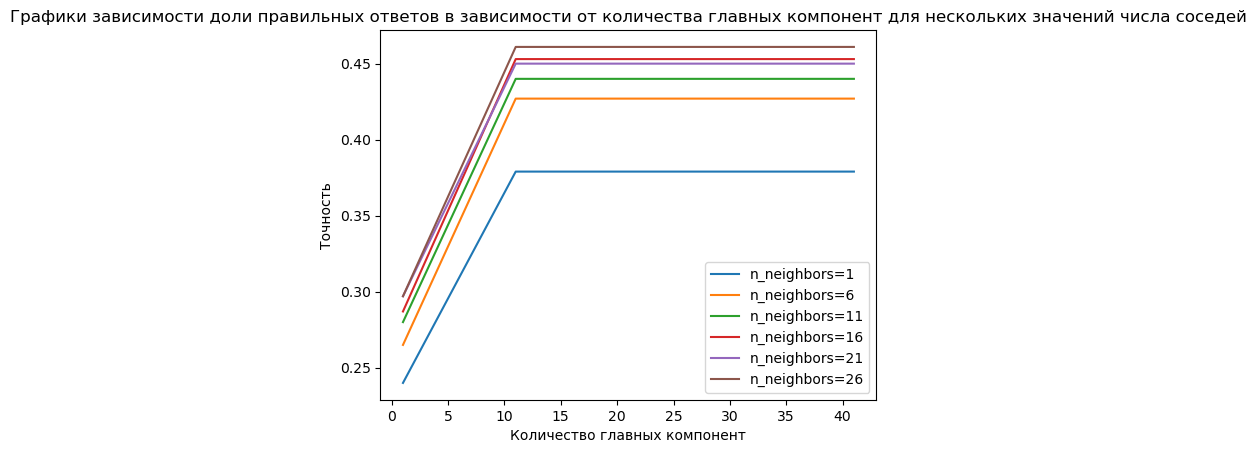

Наилучшая точность: 0.461
Наилучшее количество соседей: 26
Наилучшее количество компонент: 11


In [24]:
for n_neighbors in range(1, 31, 5):
    n_accuracies = []
    for n_components in range(1, 51, 10):
        knn = my_kNN(n_neighbors=n_neighbors)
        knn.fit(X_tr_pca[:, :n_components], y_tr)
        y_pred = knn.predict(X_test_pca[:, :n_components])
        accuracy = accuracy_score(y_test[:1000], y_pred[:1000])
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_n_neighbors = n_neighbors
            best_n_components = n_components
        n_accuracies.append(accuracy)
    accuracies.append(n_accuracies)
    plt.plot(range(1, 51, 10), n_accuracies, label=f'n_neighbors={n_neighbors}')

plt.xlabel('Количество главных компонент')
plt.ylabel('Точность')
plt.title('Графики зависимости доли правильных ответов в зависимости от количества главных компонент для нескольких значений числа соседей')
plt.legend()
plt.show()
print('Наилучшая точность:', best_accuracy) 
print('Наилучшее количество соседей:', best_n_neighbors) 
print('Наилучшее количество компонент:', best_n_components)

Я реализовал метод главных компонент и алгоритм k-ближайших соседей.

За счет метода главных компонент мы уменьшиили количество данных MNIST. Построили графики собственных значений и отношения кумулятивной суммы к полной сумме, а также график точек датасета в первых двух координатах главных компонент.

Алгоритм k-ближайших соседей (kNN) был применен для классификации объектов. Для нахождения наилучшей точности алгоритма k-ближайших соседей был использован метод главных компонент для снижения размерности данных.